# Dogs vs Cats

In [19]:
#| default_exp app
from fastai.vision.all import *
import gradio as gr

def is_cat(x): return x[0].isupper()

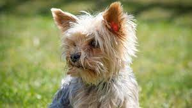

In [20]:
im = PILImage.create('dog.jpeg')
im.thumbnail((192,192))
im

In [21]:
#| export
learn = load_learner('cats.pkl')

In [22]:
learn.predict(im)

('False', TensorBase(0), TensorBase([9.9999e-01, 1.0353e-05]))

In [23]:
#| export
categories = ('Dog', 'Cat')

def classify_image(img):
    pred, idx, probs = learn.predict(img)
    return dict(zip(categories, map(float, probs)))

In [24]:
classify_image(im)

{'Dog': 0.9999896287918091, 'Cat': 1.035308014252223e-05}

In [9]:
from gradio.components import Image, Label

In [30]:
#| export

image =  Image(shape=(192,192))
label = Label()
examples = ['dog.jpeg', 'cat.jpeg', 'lemon.jpg']
intf = gr.Interface(fn=classify_image, inputs=image, outputs=label, examples=examples)
intf.launch(inline=True, share=True)

# Export

Use nbdev to create a library

In [30]:
nbdev.export.nb_export('app.ipynb', '.')
print('Successful!')

Successful!
